In [1]:
from transform_module import *
import torch
import torchvision
from PIL import Image
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# load test images
# transform to pytorch tensor
img = torch.stack(
    [torchvision.transforms.ToTensor()(Image.open(f'./test_img{i}.jpg')) for i in range(1, 4)]
    , dim=0).to(device)



In [3]:
# load transform modules
bright = Brightness()
trans_x = TranslateX()
trans_y = TranslateY()
sheer_x = SheerX()
sheer_y = SheerY()

In [4]:
# load predefined resnet model
model = torchvision.models.resnet18()
model.fc = torch.nn.Linear(in_features=512, out_features=1)
model = model.to(device)
model.train()
# save parameter for comparsion
prev_param = list(model._modules.items())[-1][1].weight.clone()

In [5]:
# set optimizer
optim = torch.optim.SGD(params=model.parameters(), lr=1e-4)

In [6]:
# predict transform parameter
param = model(img)

In [7]:
img_bright = bright(img, param)
img_trans_x = trans_x(img, param)
img_trans_y = trans_y(img, param)
img_sheer_x = sheer_x(img, param)
img_sheer_y = sheer_y(img, param)

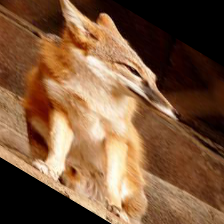

In [8]:
torchvision.transforms.ToPILImage()(img_sheer_y[0].cpu())

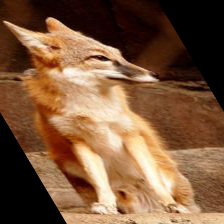

In [9]:
torchvision.transforms.ToPILImage()(img_sheer_x[0].cpu())

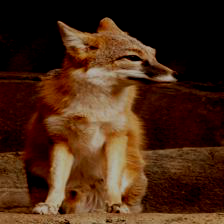

In [10]:
torchvision.transforms.ToPILImage()(img_bright[0].cpu())

In [11]:
# calculate loss
logit = img_bright.sum()
# backward loss
optim.zero_grad()
logit.backward(retain_graph=True)
optim.step()
# get params after updated
next_param = list(model._modules.items())[-1][1].weight.clone()

if (prev_param == next_param).any():
    print("grad not backproped!")
else:
    print("backproped!")

backproped
